# Interpretation of Compression Models

**Gregory Way 2018**

Visualizing results of `Tybalt` and `ADAGE` parameter sweeps over z dimensions across three different gene expression datasets.
The datasets include `TCGA`, `GTEx`, and `TARGET`.

First, to summarize the parameter sweep into a single file run:

```bash
bash scripts/summarize_sweep.sh
```

## Structure:

The notebook is ordered first by dataset, and then by algorithm. Specifically, the first section is: `Part 1A: TCGA - Tybalt` followed by `Part 1B: TCGA - ADAGE` and then `Part 2A: GTEx - Tybalt`, and so on.

## Output:

Several figures describing the results of a parameter sweep over latent space dimensionality for both Tybalt and ADAGE models in each dataset.

In [1]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 3.4.3”

In [2]:
set.seed(123)

In [3]:
`%>%` <- dplyr::`%>%`

## Load Functions and Constants

In [4]:
source(file.path('scripts', 'viz_utils.R'))

In [5]:
# Set input file names and output directories
tcga_adage_file <- file.path("results", "param_sweep_adage_TCGA_full-results.tsv")
tcga_tybalt_file <- file.path("results", "param_sweep_tybalt_TCGA_full-results.tsv")
tcga_fig_dir <- file.path("figures", "tcga_results")

gtex_adage_file <- file.path("results", "param_sweep_adage_GTEX_full-results.tsv")
gtex_tybalt_file <- file.path("results", "param_sweep_tybalt_GTEX_full-results.tsv")
gtex_fig_dir <- file.path("figures", "gtex_results")

target_adage_file <- file.path("results", "param_sweep_adage_TARGET_full-results.tsv")
target_tybalt_file <- file.path("results", "param_sweep_tybalt_TARGET_full-results.tsv")
target_fig_dir <- file.path("figures", "target_results")

## Part IA: The Cancer Genome Atlas - Tybalt

In [6]:
# Load and Process Data
tcga_tybalt <- processParamSweepResults(param_file = tcga_tybalt_file,
                                        dataset = "TCGA",
                                        algorithm = "Tybalt",
                                        output_fig_dir = tcga_fig_dir)

Warning message:
“package ‘bindrcpp’ was built under R version 3.4.3”

### 1) Final Validation Loss (TCGA, Tybalt)

Describe final validation loss for all hyperparameter combinations across the number of latent space dimensionality (x axis).

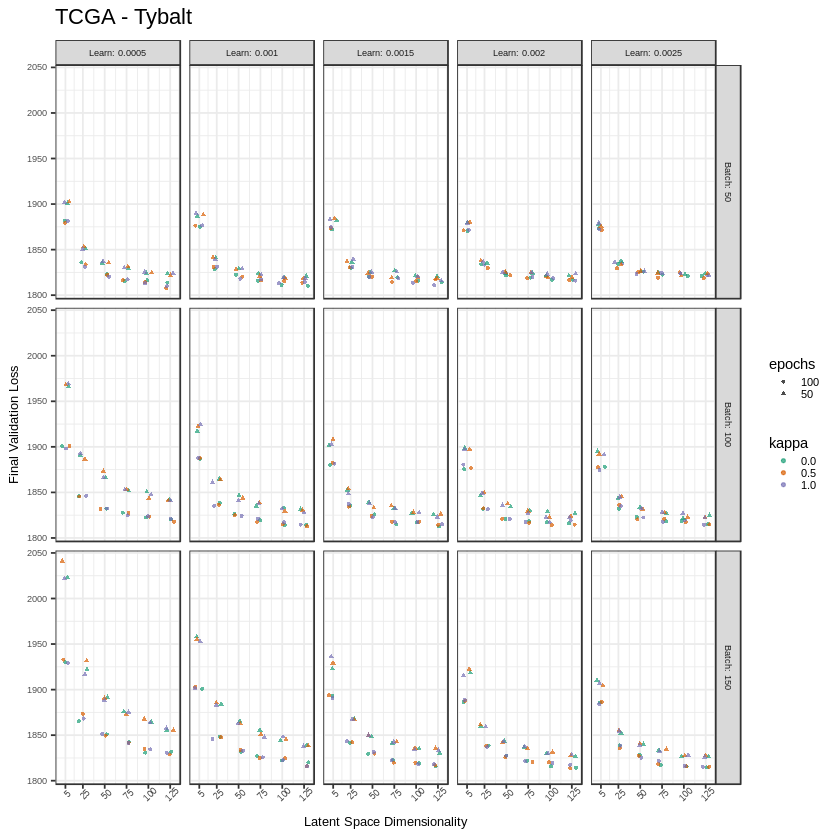

In [7]:
tcga_tybalt$final_val_plot

### 2) More Detail of Single Training Curve (TCGA, Tybalt)

Plot more detail of a single `learning rate` and `batch size` combination across all learning `epochs`.

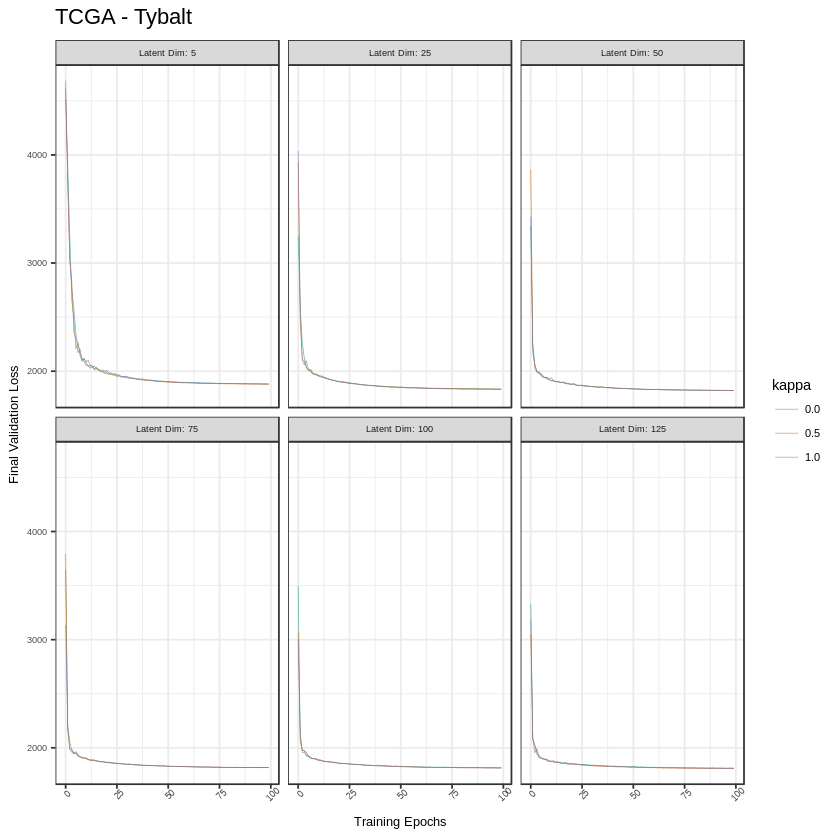

In [8]:
tcga_tybalt$one_model_plot

### 3) Determine Optimal Hyperparameters (TCGA, Tybalt)

Extract the optimal hyperparameters for each dimensionality.

In [9]:
tcga_tybalt$all_results$best_params

learning_rate,batch_size,epochs,kappa,num_components,end_loss
Learn: 0.002,Batch: 50,100,0.0,5,1870.364
Learn: 0.001,Batch: 50,100,0.0,25,1828.377
Learn: 0.001,Batch: 50,100,1.0,50,1818.103
Learn: 0.0015,Batch: 50,100,0.5,75,1814.484
Learn: 0.001,Batch: 50,100,0.0,100,1811.368
Learn: 0.0005,Batch: 50,100,0.5,125,1807.844


### 4) Interpretation of Results and Subsetting Parameters

Subset `TCGA` `Tybalt` to a single model with stable hyperparameters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
As the dimensionality increased, the `learning rate` decreased.
However, the `batch size` and `epochs` remained constant.
Also, `kappa` did not seem to impact performance.
For simplicity, alter the `learning rate` for the model, but maintain consistency for other parameters.

In [10]:
tcga_tybalt_good_training_df <- tcga_tybalt$all_results$melt_df %>%
  dplyr::filter(batch_size == 50,
                epochs == 100,
                kappa == "0.0") %>%
  dplyr::filter(
    (learning_rate == "0.002" & num_components == 5) |
      (learning_rate == "0.0015" & num_components == 25) |
      (learning_rate == "0.0015" & num_components == 50) |
      (learning_rate == "0.0015" & num_components == 75) |
      (learning_rate == "0.001" & num_components == 100) |
      (learning_rate == "0.0005" & num_components == 125)
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

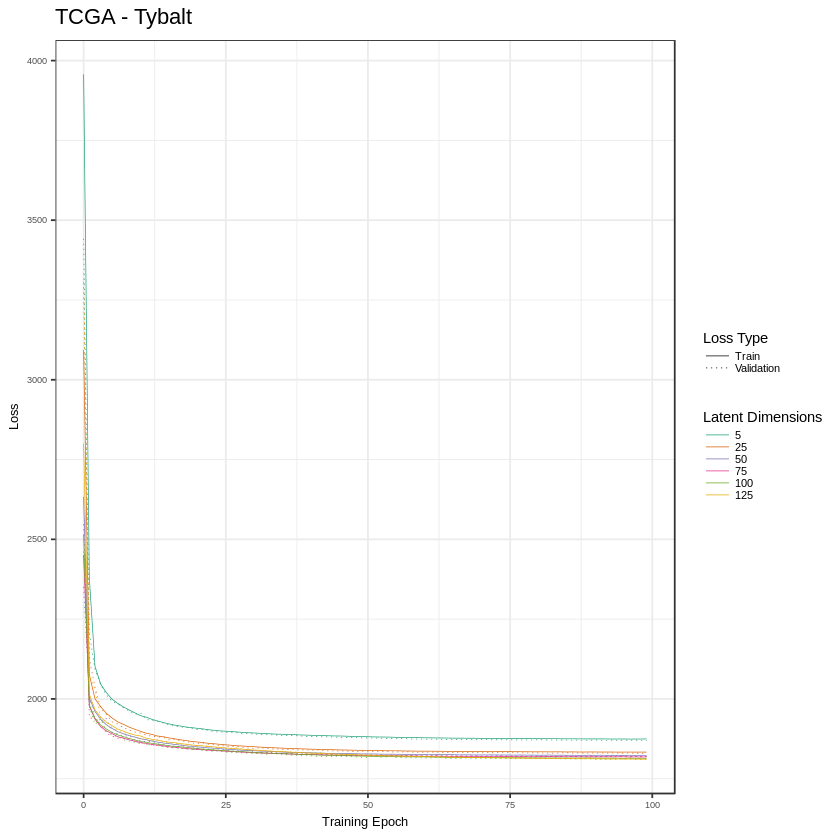

In [11]:
plotBestModel(tcga_tybalt_good_training_df,
              dataset = "TCGA",
              algorithm = "Tybalt",
              output_fig_dir = tcga_fig_dir)

## Part IB: The Cancer Genome Atlas - ADAGE

In [12]:
# Load and Process Data
tcga_adage <- processParamSweepResults(param_file = tcga_adage_file,
                                       dataset = "TCGA",
                                       algorithm = "ADAGE",
                                       output_fig_dir = tcga_fig_dir)

### 1) Final Validation Loss (TCGA, ADAGE)

Describe final validation loss for all hyperparameter combinations across the number of latent space dimensionality (x axis).

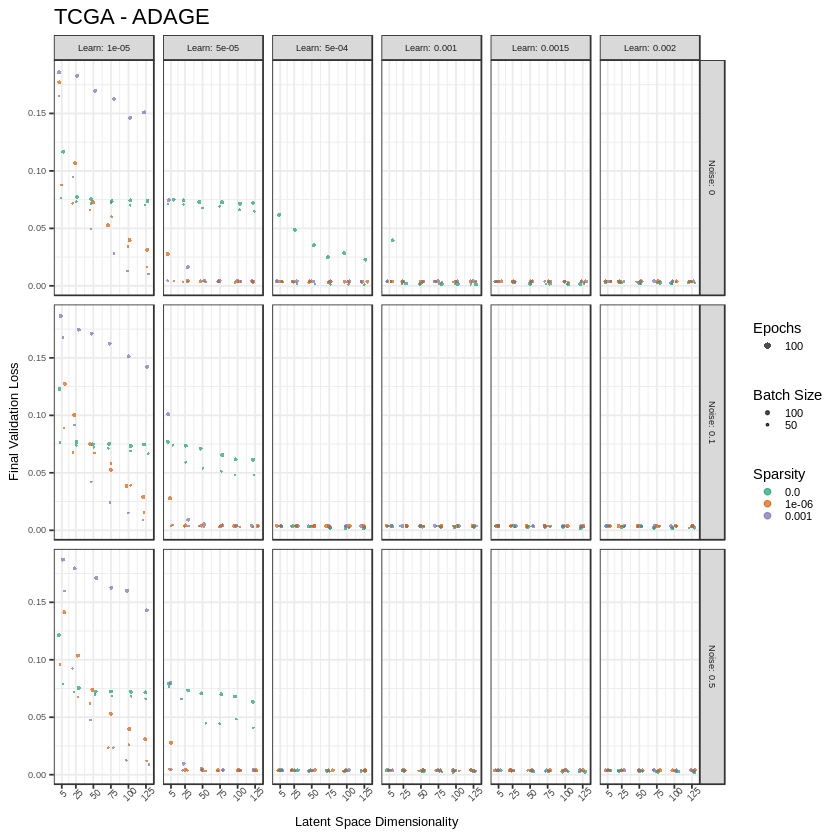

In [13]:
tcga_adage$final_val_plot

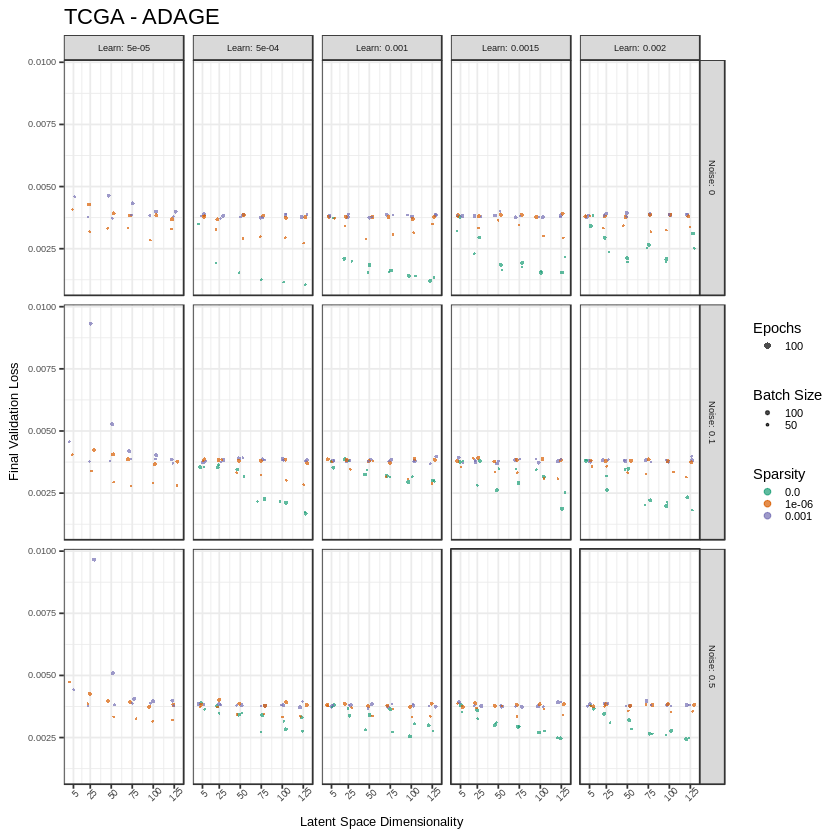

In [14]:
# Several hyperparameter combinations did not converge
# This was particularly a result of the low learning rates - filter and replot
tcga_adage_converge_df <- tcga_adage$all_results$select_df %>%
    dplyr::filter(end_loss < 0.01, learning_rate != 'Learn: 1e-05')

# Replot and Save Update
plotFinalLoss(tcga_adage_converge_df,
              dataset = "TCGA",
              algorithm = "ADAGE",
              output_fig_dir = tcga_fig_dir,
              plot_converge = TRUE)

### 2) More Detail of Single Training Curve (TCGA, ADAGE)

Plot more detail of a single `learning rate`, `batch size`, and `sparsity` combination.

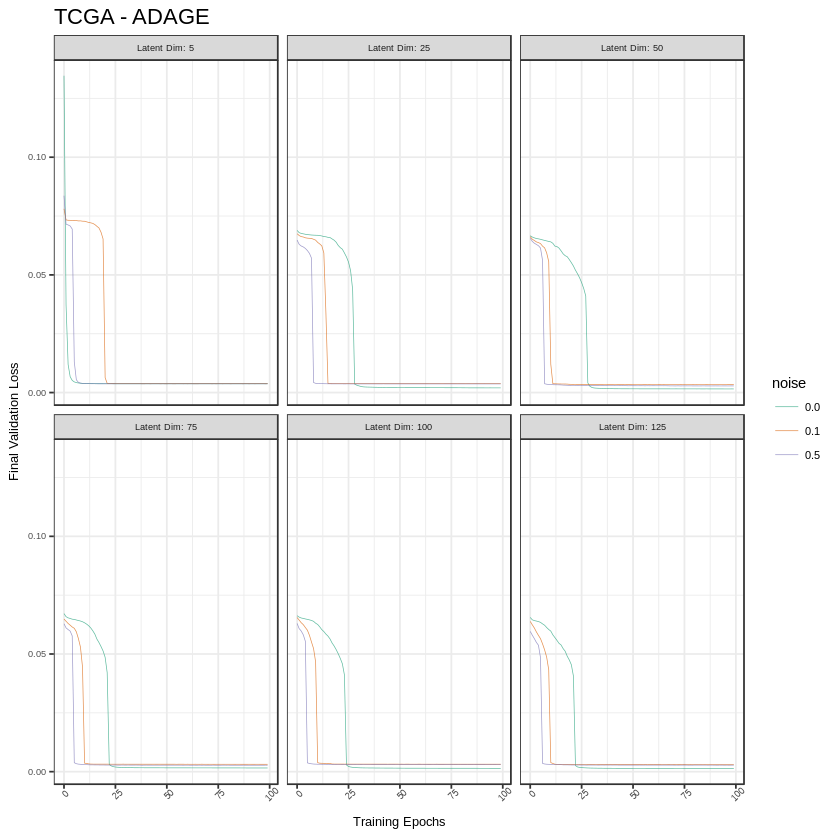

In [15]:
tcga_adage$one_model_plot

### 3) Determine Optimal Hyperparameters (TCGA, ADAGE)

Extract the optimal hyperparameters for each dimensionality.

In [16]:
tcga_adage$all_results$best_params

learning_rate,batch_size,epochs,noise,sparsity,num_components,end_loss
Learn: 0.0015,50,100,Noise: 0,0.0,5,0.003209832
Learn: 5e-04,50,100,Noise: 0,0.0,25,0.001924451
Learn: 5e-04,50,100,Noise: 0,0.0,50,0.001533053
Learn: 5e-04,50,100,Noise: 0,0.0,75,0.001255852
Learn: 5e-04,50,100,Noise: 0,0.0,100,0.001153771
Learn: 5e-04,50,100,Noise: 0,0.0,125,0.001054904


### 4) Interpretation of Results and Subsetting Parameters

Subset `TCGA` `ADAGE` to single model with stable hyperparamters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
As the dimensionaly increased, the `learning rate`, `batch size`, `epochs` and `sparsity` remained relatively consistent. However, the `noise` and `sparsity` added displayed reduced performance across dimensionality.

In [17]:
tcga_adage_good_training_df <- tcga_adage$all_results$melt_df %>%
  dplyr::filter(sparsity == "0.0",
                epochs == 100,
                batch_size == 50,
                noise == "0.0") %>%
  dplyr::filter(
    (num_components == 5 & learning_rate == "0.0015") |
      (num_components == 25 & learning_rate == "0.0015") |
      (num_components == 50 & learning_rate == "0.0005") |
      (num_components == 75 & learning_rate == "0.0005") |
      (num_components == 100 & learning_rate == "0.0005") |
      (num_components == 125 & learning_rate == "0.0005")
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

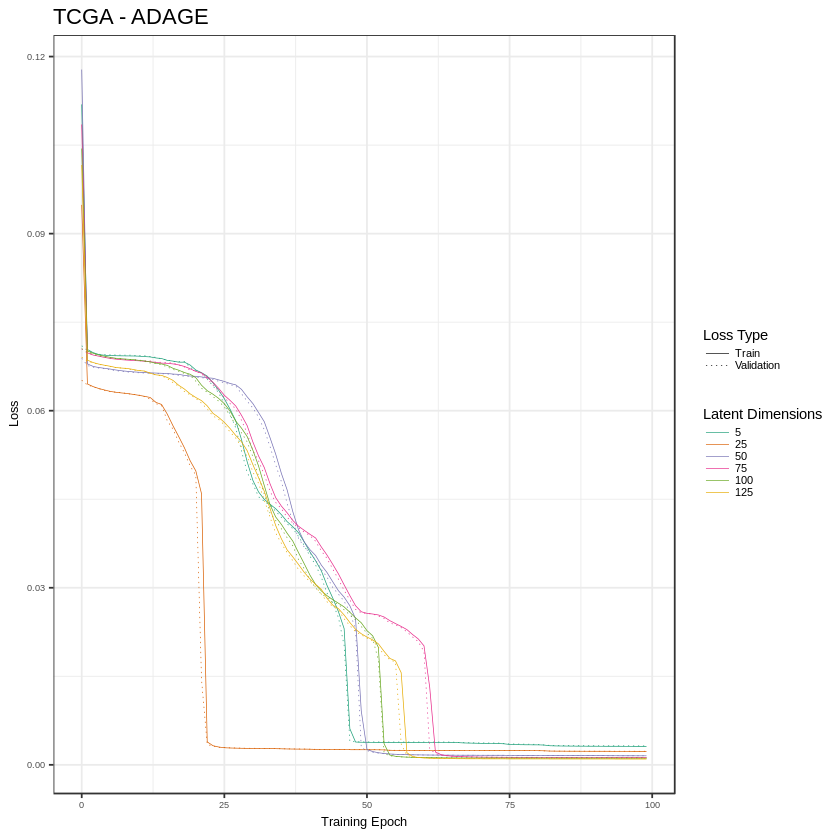

In [18]:
plotBestModel(tcga_adage_good_training_df,
              dataset = "TCGA",
              algorithm = "ADAGE",
              output_fig_dir = tcga_fig_dir)

## Part 2A: GTEx - Tybalt

In [19]:
# Load and process data
gtex_tybalt <- processParamSweepResults(param_file = gtex_tybalt_file,
                                        dataset = "GTEx",
                                        algorithm = "Tybalt",
                                        output_fig_dir = gtex_fig_dir)

### 1) Final Validation Loss (GTEx, Tybalt)

Describe final validation loss for all hyperparameter combinations across number of latent space dimensionality (x axis).

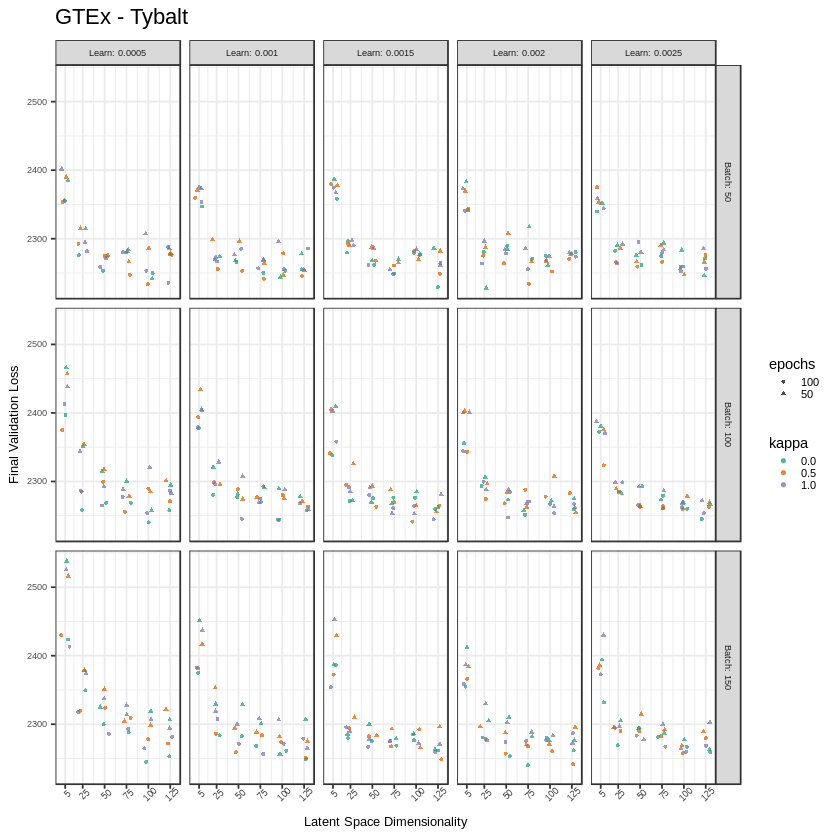

In [20]:
gtex_tybalt$final_val_plot

### 2) More Detail of Single Training Curve (GTEx, Tybalt)

Plot more detail of a single learning rate and batch size combination.

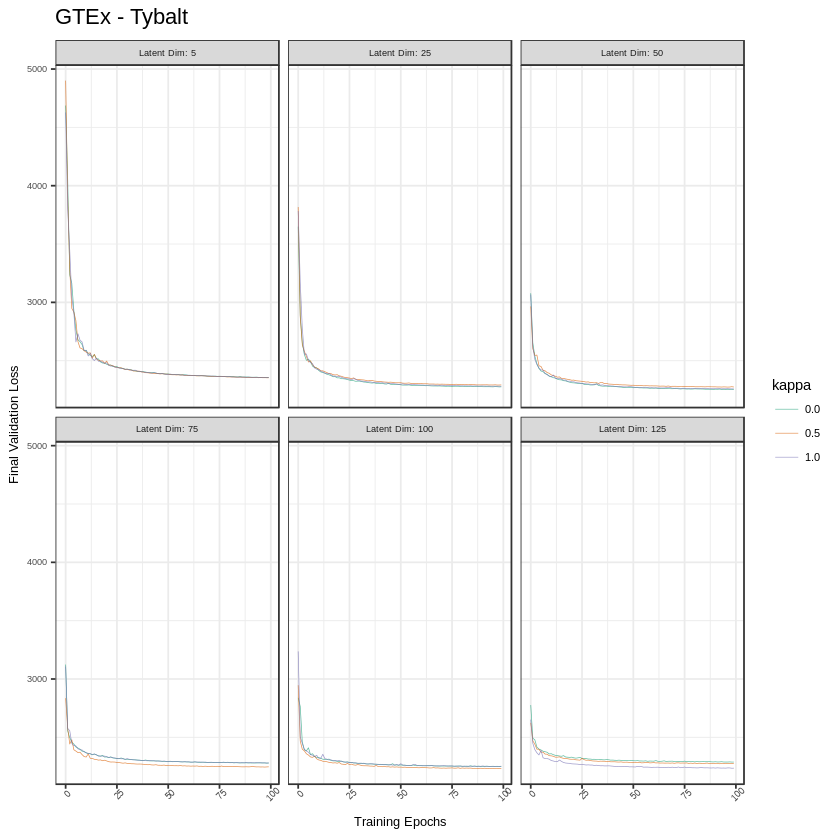

In [21]:
gtex_tybalt$one_model_plot

### 3) Determine Optimal Hyperparameters (GTEx, Tybalt)

Extract the optimal hyperparameters for each dimensionality.

In [22]:
gtex_tybalt$all_results$best_params

learning_rate,batch_size,epochs,kappa,num_components,end_loss
Learn: 0.0025,Batch: 100,100,0.5,5,2323.422
Learn: 0.002,Batch: 50,50,0.0,25,2227.978
Learn: 0.001,Batch: 100,100,1.0,50,2245.759
Learn: 0.002,Batch: 50,100,0.5,75,2234.204
Learn: 0.0005,Batch: 50,100,0.5,100,2233.519
Learn: 0.0015,Batch: 50,100,0.0,125,2229.193


### 4) Interpretation of Results and Subsetting Parameters

Subset `Tybalt` `GTEx` to single models with stable hyperparamters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
All parameter combinations were fairly consistent.
Specifically, smaller `batch sizes` were associated with better performance.
We also observed better performance with higher `learning rates` in models with fewer components.
`kappa` and `epochs` were relatively stable at similar levels across components.

In [23]:
gtex_tybalt_good_training_df <- gtex_tybalt$all_results$melt_df %>%
  dplyr::filter(epochs == 100, kappa == 0.5) %>%
  dplyr::filter(
    (learning_rate == "0.0025" & batch_size == 100 & num_components == 5) |
      (learning_rate == "0.0025" & batch_size == 100 & num_components == 25) |
      (learning_rate == "0.002" & batch_size == 100 & num_components == 50) |
      (learning_rate == "0.002" & batch_size == 50 & num_components == 75) |
      (learning_rate == "0.0015" & batch_size == 50 & num_components == 100) |
      (learning_rate == "0.0015" & batch_size == 50 & num_components == 125)
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

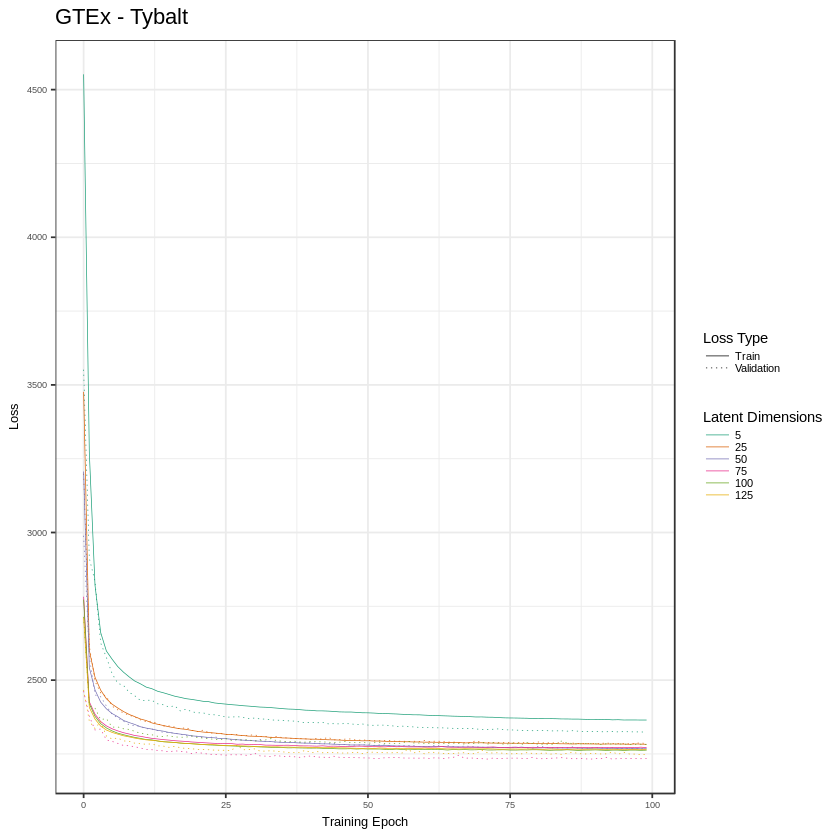

In [24]:
plotBestModel(gtex_tybalt_good_training_df,
              dataset = "GTEx",
              algorithm = "Tybalt",
              output_fig_dir = gtex_fig_dir)

## Part 2B: GTEx - ADAGE

In [25]:
# Load and process data
gtex_adage <- processParamSweepResults(param_file = gtex_adage_file,
                                       dataset = "GTEx",
                                       algorithm = "ADAGE",
                                       output_fig_dir = gtex_fig_dir)

### 1) Final Validation Loss (GTEx, ADAGE)

Describe final validation loss for all hyperparameter combinations across number of latent space dimensionality (x axis).

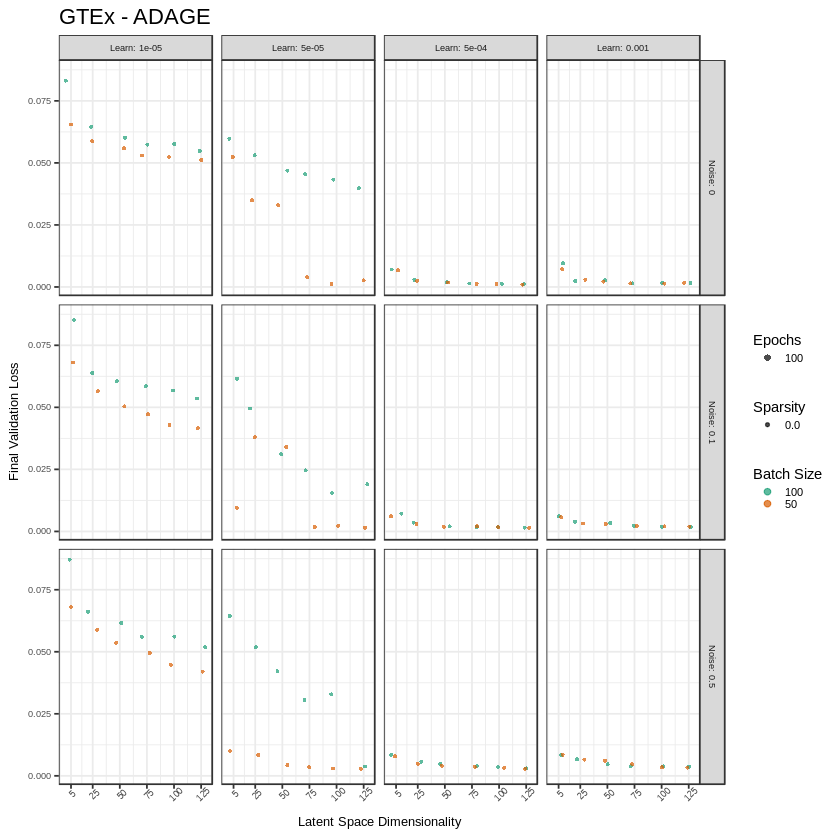

In [26]:
gtex_adage$final_val_plot

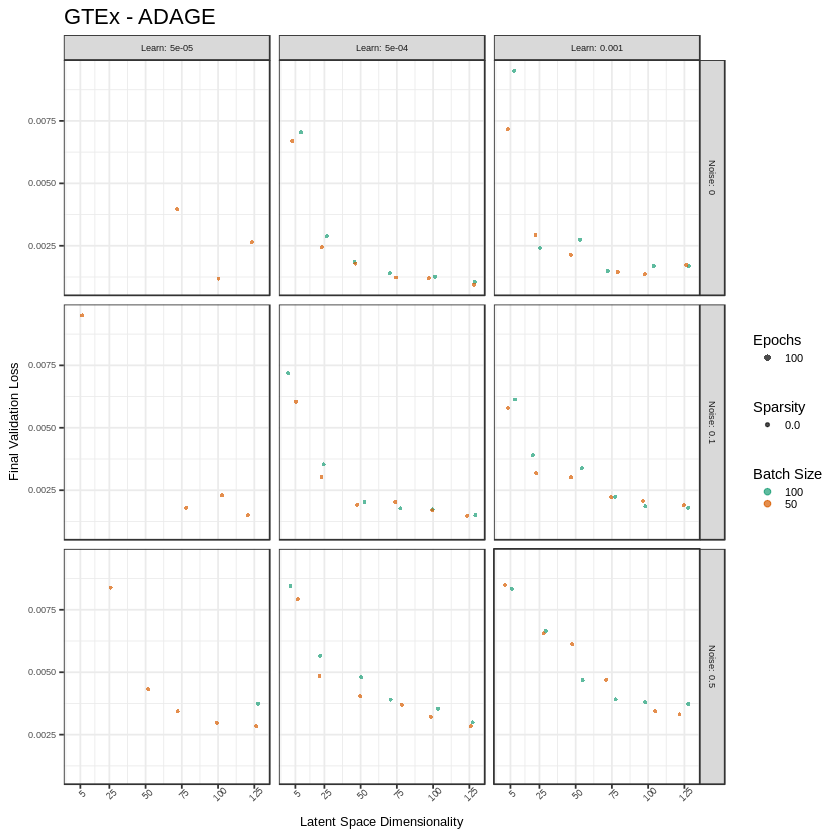

In [27]:
# Several hyperparameter combinations did not converge
# This was particularly a result of the low learning rates - filter and replot
gtex_adage_converge_df <- gtex_adage$all_results$select_df %>%
    dplyr::filter(end_loss < 0.01, learning_rate != 'Learn: 1e-05')

# Replot and save update
plotFinalLoss(gtex_adage_converge_df,
              dataset = "GTEx",
              algorithm = "ADAGE",
              output_fig_dir = gtex_fig_dir,
              plot_converge = TRUE)

### 2) More Detail of Single Training Curve (GTEx, ADAGE)

Plot more detail of a single `learning rate`, `batch size`, and `sparsity` combination.

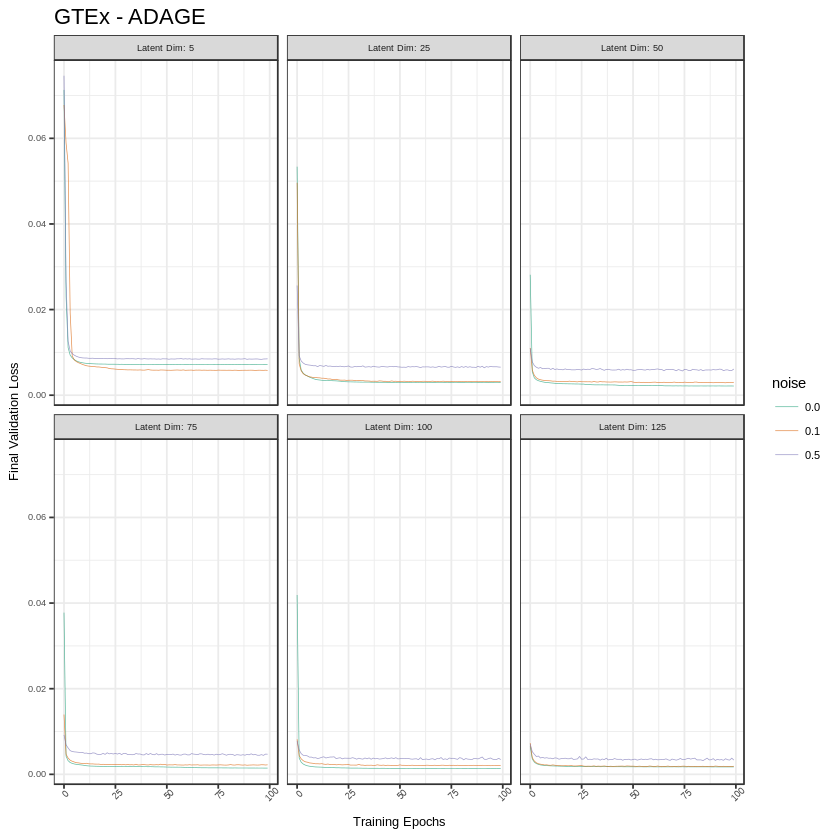

In [28]:
gtex_adage$one_model_plot

### 3) Determine Optimal Hyperparameters (GTEx, ADAGE)

Extract the optimal hyperparameters for each dimensionality.

In [29]:
gtex_adage$all_results$best_params

learning_rate,batch_size,epochs,noise,sparsity,num_components,end_loss
Learn: 0.001,50,100,Noise: 0.1,0.0,5,0.0057914949
Learn: 0.001,100,100,Noise: 0,0.0,25,0.0024124739
Learn: 5e-04,50,100,Noise: 0,0.0,50,0.0017888015
Learn: 5e-04,50,100,Noise: 0,0.0,75,0.0012287076
Learn: 5e-05,50,100,Noise: 0,0.0,100,0.0011807038
Learn: 5e-04,50,100,Noise: 0,0.0,125,0.0009444399


### 4) Interpretation of Results and Subsetting Parameters

Subset `GTEx` `ADAGE` to single models with stable hyperparamters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
For this model, we did not test different numbers of `epochs` or `sparsity` because we had observed little impact to these variables.
We did observe that smaller `batch sizes` were associated with better performance.
The `learning rate` also increased with increasing number of components.
`noise` also decreased to zero after the smallest model.

In [30]:
gtex_adage_good_training_df <- gtex_adage$all_results$melt_df %>%
  dplyr::filter(sparsity == "0.0",
                epochs == 100,
                batch_size == 50) %>%
  dplyr::filter(
    (num_components == 5 & learning_rate == "0.001" & noise == "0.1") |
      (num_components == 25 & learning_rate == "0.001" & noise == "0.0") |
      (num_components == 50 & learning_rate == "0.0005" & noise == "0.0") |
      (num_components == 75 & learning_rate == "0.0005" & noise == "0.0") |
      (num_components == 100 & learning_rate == "0.0005" & noise == "0.0") |
      (num_components == 125 & learning_rate == "0.0005" & noise == "0.0")
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

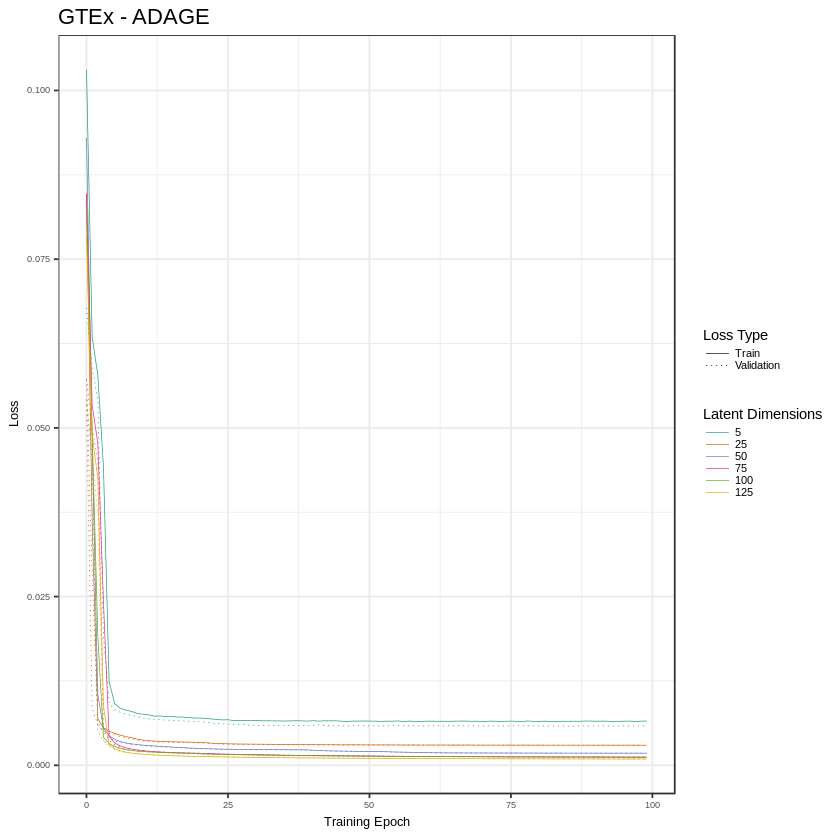

In [31]:
plotBestModel(gtex_adage_good_training_df,
              dataset = "GTEx",
              algorithm = "ADAGE",
              output_fig_dir = gtex_fig_dir)

## Part 3A: TARGET - Tybalt

In [32]:
# Load and process data
target_tybalt <- processParamSweepResults(param_file = target_tybalt_file,
                                          dataset = "TARGET",
                                          algorithm = "Tybalt",
                                          output_fig_dir = target_fig_dir)

### 1) Final Validation Loss (TARGET, Tybalt)

Describe final validation loss for all hyperparameter combinations across number of latent space dimensionality (x axis).

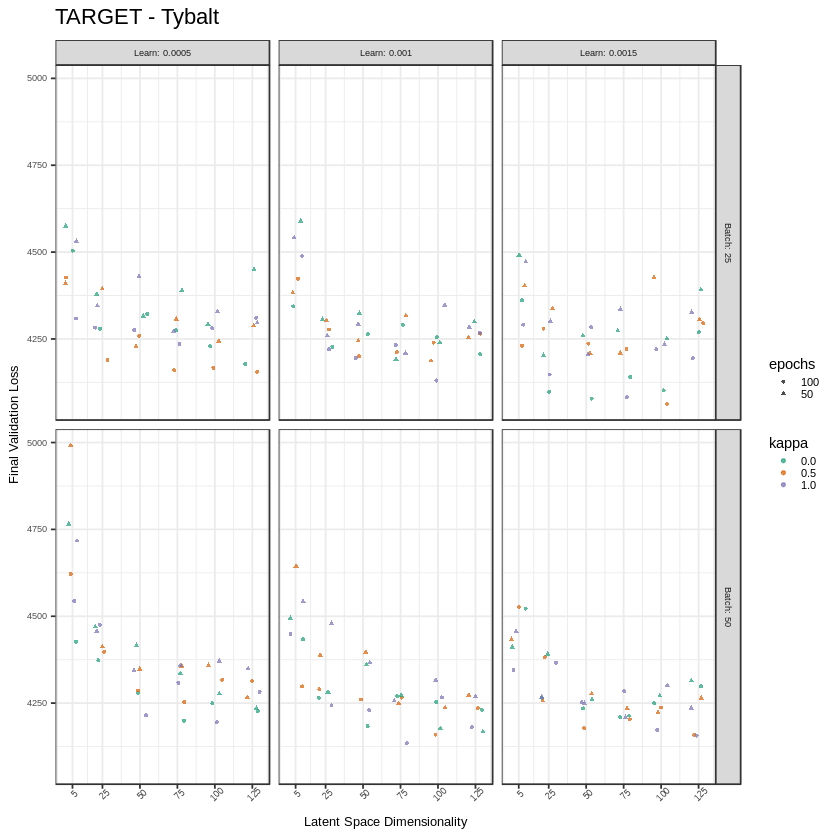

In [33]:
target_tybalt$final_val_plot

### 2) More Detail of Single Training Curve (TARGET, Tybalt)

Plot more detail of a single learning rate and batch size combination.

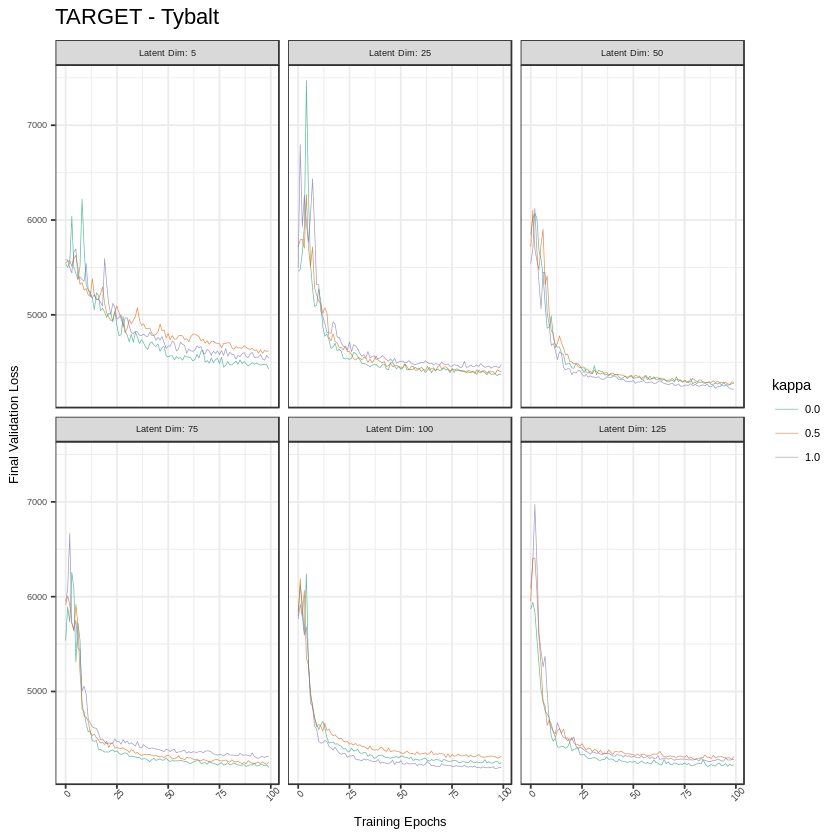

In [34]:
target_tybalt$one_model_plot

### 3) Determine Optimal Hyperparameters (TARGET, Tybalt)

Extract the optimal hyperparameters for each dimensionality.

In [35]:
target_tybalt$all_results$best_params

learning_rate,batch_size,epochs,kappa,num_components,end_loss
Learn: 0.0015,Batch: 25,100,0.5,5,4230.531
Learn: 0.0015,Batch: 25,100,0.0,25,4097.768
Learn: 0.0015,Batch: 25,100,0.0,50,4078.561
Learn: 0.0015,Batch: 25,100,1.0,75,4082.613
Learn: 0.0015,Batch: 25,100,0.5,100,4063.113
Learn: 0.0005,Batch: 25,100,0.5,125,4155.268


### 4) Interpretation of Results and Subsetting Parameters

Subset `TARGET` `Tybalt` to single models with stable hyperparamters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
All parameter combinations were fairly consistent.
Smaller `batch_sizes` (25) was consistent throughout all models, with high number of `epochs` (100).
With `learning_rate` = 0.0015, the model actually started to get worse in higher dimensions.
The `kappa` parameter impacted the models most with this `learning_rate` and `batch_size`.
`kappa` = 0.5 seemed to be the most consistent.

In [36]:
target_tybalt_good_training_df <- target_tybalt$all_results$melt_df %>%
  dplyr::filter(batch_size == 25,
                epochs == 100,
                kappa == '0.5') %>%
  dplyr::filter(
    (num_components == 5 & learning_rate == "0.0015") |
      (num_components == 25 & learning_rate == "0.0015") |
      (num_components == 50 & learning_rate == "0.0015") |
      (num_components == 75 & learning_rate == "0.0015") |
      (num_components == 100 & learning_rate == "0.0015") |
      (num_components == 125 & learning_rate == "0.0005")
  ) %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

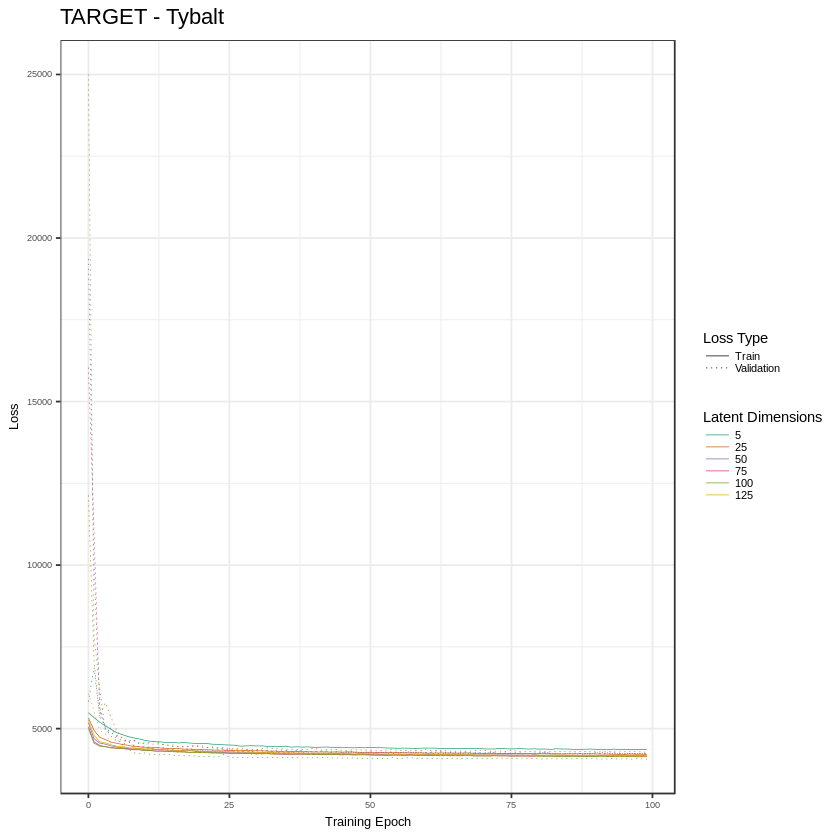

In [37]:
plotBestModel(target_tybalt_good_training_df,
              dataset = "TARGET",
              algorithm = "Tybalt",
              output_fig_dir = target_fig_dir)

## Part 3B: TARGET - ADAGE

In [38]:
# Load and process data
target_adage <- processParamSweepResults(param_file = target_adage_file,
                                         dataset = "TARGET",
                                         algorithm = "ADAGE",
                                         output_fig_dir = target_fig_dir)

### 1) Final Validation Loss (TARGET, ADAGE)

Describe final validation loss for all hyperparameter combinations across number of latent space dimensionality (x axis).

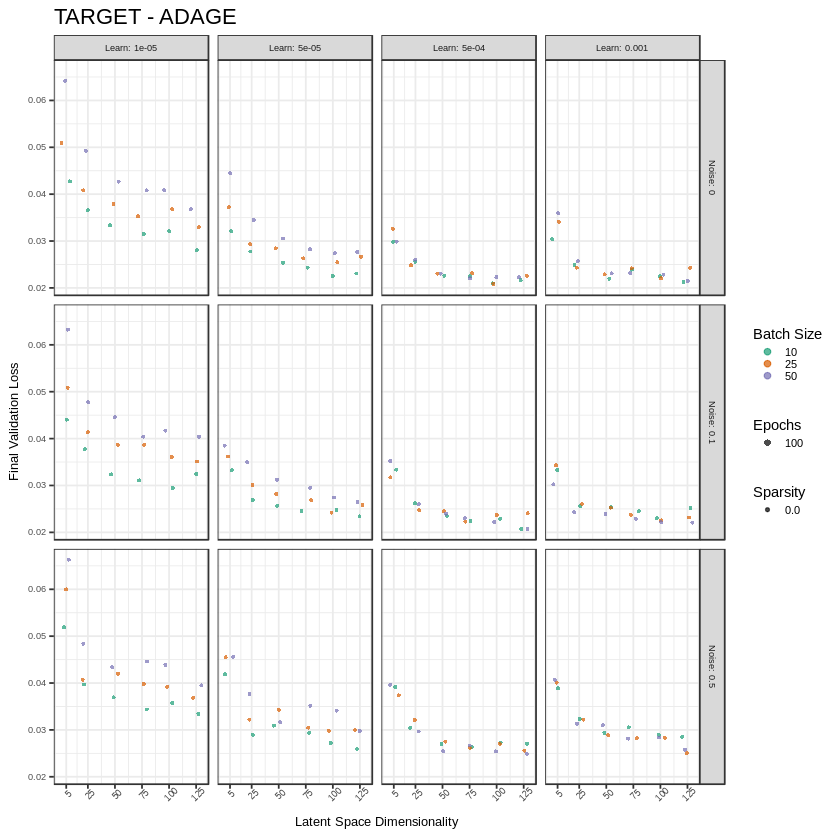

In [39]:
target_adage$final_val_plot

### 2) More Detail of Single Training Curve (GTEx, ADAGE)

Plot more detail of a single `learning rate`, `batch size`, and `sparsity` combination.

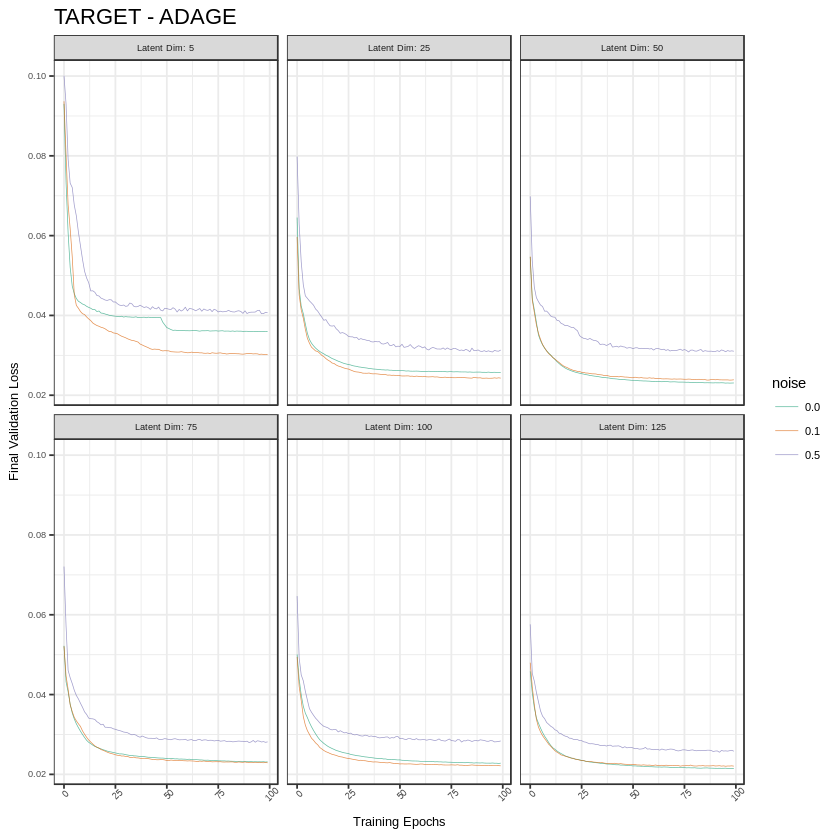

In [40]:
target_adage$one_model_plot

### 3) Determine Optimal Hyperparameters (TARGET, ADAGE)

Extract the optimal hyperparameters for each dimensionality.

In [41]:
target_adage$all_results$best_params

learning_rate,batch_size,epochs,noise,sparsity,num_components,end_loss
Learn: 5e-04,10,100,Noise: 0,0.0,5,0.02985558
Learn: 0.001,50,100,Noise: 0.1,0.0,25,0.02429172
Learn: 0.001,10,100,Noise: 0,0.0,50,0.02195607
Learn: 5e-04,50,100,Noise: 0,0.0,75,0.02206826
Learn: 5e-04,25,100,Noise: 0,0.0,100,0.02085419
Learn: 5e-04,50,100,Noise: 0.1,0.0,125,0.02070062


### 4) Interpretation of Results and Subsetting Parameters

Subset `TARGET` `ADAGE` to single models with stable hyperparamters.
These parameters will be used in downstream applications sweeping over latent space dimensionality.

We observed that increasing the number of components resulted in changes to optimal hyperparameters.
All parameter combinations were fairly consistent.
The `ADAGE` model seemd to be more stable using the TARGET data than `Tybalt`.
`batch_size` did not seem to impact performance much.
We only tested `epochs = 100` and `sparsity = 0` because of evidence from previous models.
All models performed best with slightly higher learning rates.
For simplicity, all ADAGE models will use the same parameter combination, and this analysis confirmed stable solutions.

In [42]:
target_adage_good_training_df <- target_adage$all_results$melt_df %>%
  dplyr::filter(sparsity == "0.0",
                epochs == 100,
                batch_size == 50,
                noise == "0.1",
                learning_rate == "0.0005") %>%
  dplyr::mutate(
      num_components =
          factor(num_components,
                 levels = sort(as.numeric(paste(unique(num_components)))))
  )

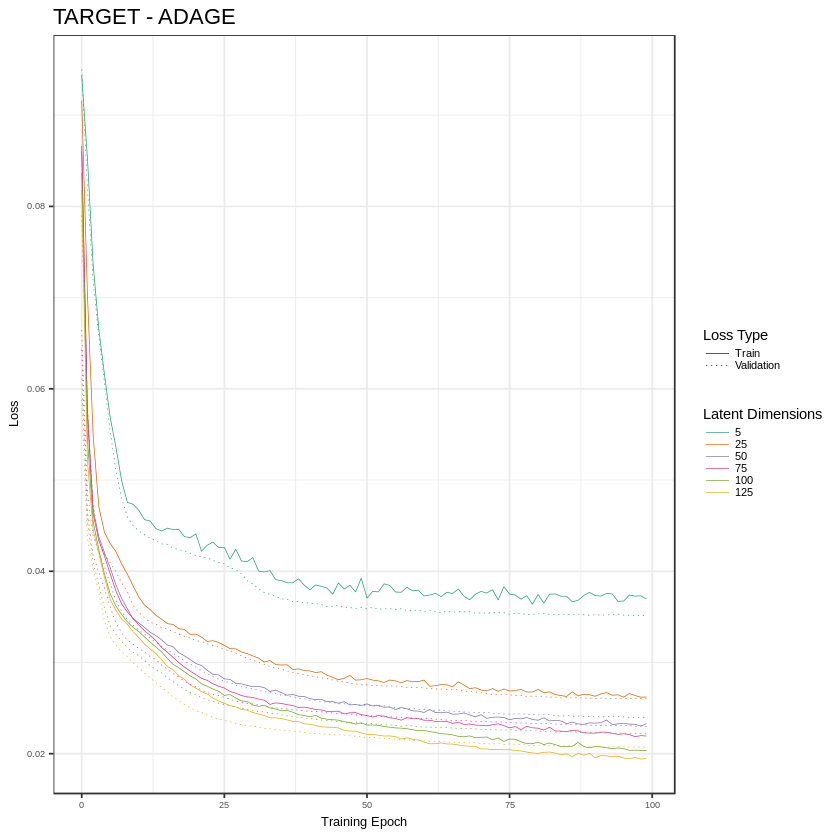

In [43]:
plotBestModel(target_adage_good_training_df,
              dataset = "TARGET",
              algorithm = "ADAGE",
              output_fig_dir = target_fig_dir)